In [ ]:
pip install chart-studio


In [ ]:
import chart_studio.plotly as py
import numpy as np
import pandas as pd


# Plotly Packages
from plotly import tools
# import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

original_df = df.copy()

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In this project phase, the distribution of patient charges is analyzed to understand data spread. Visualizing both the original and logarithmically transformed distributions reveals essential patterns, helping identify skewness and normalize the data. This step is vital for selecting appropriate statistical or machine learning methods in later stages, ensuring accurate and effective analysis.

In [ ]:
# Analyzing the distribution of patient charges
configure_plotly_browser_state()
charges_data = df["charges"].values
log_charges = np.log(df["charges"])

charge_distribution_trace = go.Histogram(
    x=charges_data,
    histnorm='probability',
    name="Distribution of Charges",
    marker=dict(
        color='#82CAFA',
    )
)
log_charge_distribution_trace = go.Histogram(
    x=log_charges,
    histnorm='probability',
    name="Logarithmic Charge Distribution",
    marker=dict(
        color='#F781F3',
    )
)

# Setting up the subplot structure
subplot_fig = tools.make_subplots(rows=2, cols=1,
                                  subplot_titles=('Distribution of Charges', 'Logarithmic Distribution of Charges'),
                                  print_grid=False)

# Adding traces to the subplot
subplot_fig.append_trace(charge_distribution_trace, 1, 1)
subplot_fig.append_trace(log_charge_distribution_trace, 2, 1)

# Updating layout and displaying the plot
subplot_fig['layout'].update(showlegend=True, title='Analysis of Patient Charge Distributions', bargap=0.05)
iplot(subplot_fig, filename='subplot-distribution-analysis')


### Age Analysis:
<a id="age_cat"></a>
<h4>Turning Age into Categorical Variables: </h4>
<ul>
    <li><b>Young Adult: </b> from 18 - 35 </li>
    <li><b>Senior Adult: </b> from 36 - 55 </li>
    <li><b>Elder: </b> 56 or older </li>
    <li><b> Share of each Category: </b> Young Adults (42.9%), Senior Adults (41%) and Elder (16.1%) </li>
    </ul>

By categorizing individuals into 'Young Adult', 'Senior Adult', and 'Elder' groups, the bar chart effectively compares the count of each category. This method provides a clearer comparison and an immediate visual contrast between the groups.

In [ ]:
configure_plotly_browser_state()

df['age_cat'] = np.nan
for col in [df]:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'

# Preparing data for the bar chart
age_category_counts = df['age_cat'].value_counts()
colors = ['#FFD700', '#C0C0C0', '#CD7F32']

data = [go.Bar(
            x=age_category_counts.index,
            y=age_category_counts.values,
            marker=dict(color=colors)
    )]

layout = go.Layout(
    title='Age Category Distribution',
    xaxis=dict(title='Age Categories'),
    yaxis=dict(title='Count'),
    width=600,
    height=400
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='age_category_bar_chart')


In [ ]:
configure_plotly_browser_state()

correlation_matrix = df.corr()

# Creating a heatmap to visualize the correlation matrix
heatmap = go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Cividis'
)

heatmap_data = [heatmap]
heatmap_layout = go.Layout(
    title='Heatmap of Variable Correlations',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    width=600,
    height=400
)

correlation_fig = go.Figure(data=heatmap_data, layout=heatmap_layout)
iplot(correlation_fig, filename='correlation_matrix_heatmap')


In [ ]:
configure_plotly_browser_state()

import plotly.graph_objects as go
from plotly.offline import iplot
import pandas as pd

# Create separate arrays for different age categories
young_adults = df["bmi"].loc[df["age_cat"] == "Young Adult"].values
senior_adults = df["bmi"].loc[df["age_cat"] == "Senior Adult"].values
elders = df["bmi"].loc[df["age_cat"] == "Elder"].values

box_plot_young_adults = go.Box(
    y=young_adults,
    name='Young Adults',
    boxmean=True,
    marker=dict(
        color='rgb(214, 45, 66)',
    )
)

box_plot_senior_adults = go.Box(
    y=senior_adults,
    name='Senior Adults',
    boxmean=True,
    marker=dict(
        color='rgb(0, 128, 66)',
    )
)

box_plot_elders = go.Box(
    y=elders,
    name='Elders',
    boxmean=True,
    marker=dict(
        color='rgb(247, 44, 166)',
    )
)

data = [box_plot_young_adults, box_plot_senior_adults, box_plot_elders]

layout = go.Layout(
    title="Body Mass Index by Age Category",
    xaxis=dict(
        title="Age Category",
        titlefont=dict(size=16)
    ),
    yaxis=dict(
        title="Body Mass Index",
        titlefont=dict(size=16)
    ),
    width=600,
    height=400

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


A new categorical label, "weightcategory," was introduced in the data analysis. This label was derived from individuals' Body Mass Index (BMI) values, and individuals were classified into four distinct health conditions:

Underweight: Designated for individuals with a BMI less than 18.5.
Normal Weight: Assigned to individuals with a BMI greater than or equal to 18.5 and less than 24.9.
Overweight: Given to individuals with a BMI greater than or equal to 25 and less than 29.9.
Obese: Applied to individuals with a BMI greater than 30.

In [ ]:
import numpy as np

df["weightcategory"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weightcategory"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weightcategory"] = "NormalWeight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weightcategory"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weightcategory"] = "Obese"

df.head()


,age,sex,bmi,children,smoker,region,charges,age_cat,weightcategory
0,19,female,27.90000,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.77000,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.00000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.70500,0,no,northwest,21984.47061,Young Adult,NormalWeight
4,32,male,28.88000,0,no,northwest,3866.85520,Young Adult,Overweight


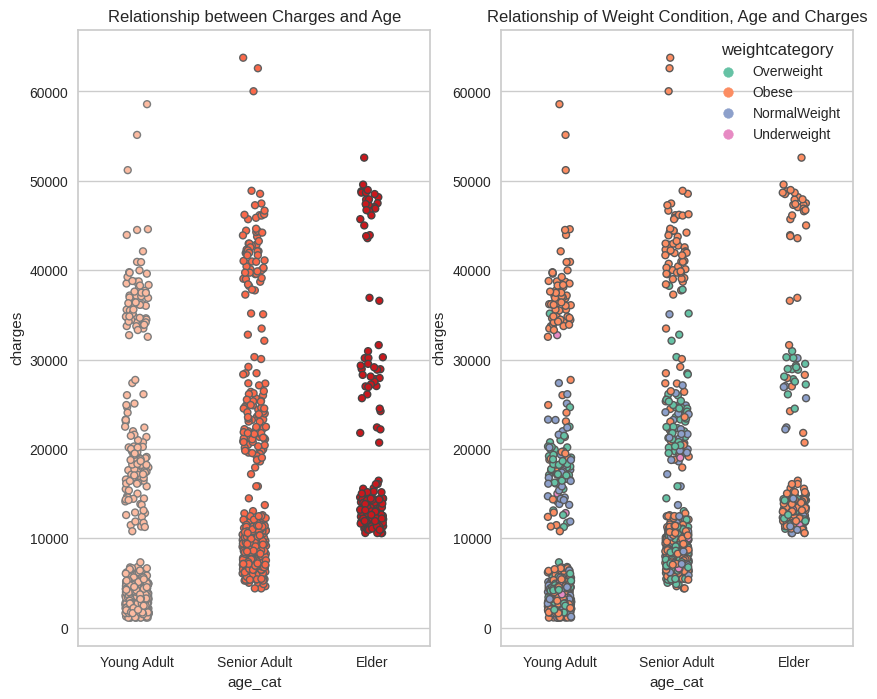

In [ ]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8))
configure_plotly_browser_state()

sns.stripplot(x="age_cat", y="charges", data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")

sns.stripplot(x="age_cat", y="charges", hue="weightcategory", data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Weight Condition, Age and Charges")

plt.show()


In [ ]:
configure_plotly_browser_state()

color_map = {
    'Underweight': 'rgb(77, 175, 74)',
    'NormalWeight': 'rgb(55, 126, 184)',
    'Overweight': 'rgb(255, 127, 14)',
    'Obese': 'rgb(228, 26, 28)'
}

fig = ff.create_facet_grid(
    df,
    x='age',
    y='charges',
    color_name='weightcategory',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap=color_map
)

fig['layout'].update(
    title="Weight Status vs Charges",
    width=600,
    height=400,
    plot_bgcolor='rgb(251, 251, 251)',
    paper_bgcolor='rgb(255, 255, 255)'
)

iplot(fig, filename='facet-custom-colormap')


In the analysis of Weight Status vs. Charges, it is observed that, among overweight individuals, there are two distinct groups that receive significantly higher charges compared to the remaining overweight population. Similarly, within the obese category, a similar pattern is identified, where one subgroup incurs notably higher charges compared to the other subgroup.

In [ ]:
total_obese = len(df.loc[df["weightcategory"] == "Obese"])

obese_smoker_prop = len(df.loc[(df["weightcategory"] == "Obese") & (df["smoker"] == "yes")])/total_obese
obese_smoker_prop = round(obese_smoker_prop, 2)

obese_nonsmoker_prop = len(df.loc[(df["weightcategory"] == "Obese") & (df["smoker"] == "no")])/total_obese
obese_nonsmoker_prop = round(obese_nonsmoker_prop, 2)


# Average charge by obese_smokers and obese_nonsmoker
charge_obese_smoker = df.loc[(df["weightcategory"] == "Obese") & (df["smoker"] == "yes")].mean()
charge_obese_nonsmoker = df.loc[(df["weightcategory"] == "Obese") & (df["smoker"] == "no")].mean()

In [ ]:
configure_plotly_browser_state()

chargedist_sm = df["charges"].loc[(df["weightcategory"] == "Obese") & (df["smoker"] == "yes")].values
chargedist_nsm = df["charges"].loc[(df["weightcategory"] == "Obese") & (df["smoker"] == "no")].values

trace0 = go.Box(
    y=chargedist_sm,
    name = 'Obese Smokers',
    marker = dict(
        color = '#DF0101',
    )
)
trace1 = go.Box(
    y=chargedist_nsm,
    name = 'Obese Non-Smokers',
    marker = dict(
        color = '#00FF40',
    )
)


data = [trace0, trace1]


layout = dict(title="Deeper Look into Obese condition by Smoking status",
             xaxis=dict(
             title="Status",
             titlefont=dict(
             size=16)),
             yaxis=dict(title="Patient Charges",
                       titlefont=dict(size=16)),
             width=600,
             height=400
            )



fig = go.Figure(data=data, layout=layout)
iplot(fig)

Based on these visualizations, distinctions can be observed in the payment patterns between obese non-smokers and obese smokers. Notably, obese smokers incur significantly higher charges. Consequently, further division is warranted to differentiate between these two groups. This chart allows us to visualize the segregation of obese smokers and obese non-smokers into distinct clusters. Hence, it can be asserted that smoking constitutes a characteristic that undeniably influences patients' charges.

In [ ]:
# Create a Scatter Plot with all the Obese
configure_plotly_browser_state()

obese_smoker = df.loc[(df["weightcategory"] == "Obese") & (df["smoker"] == "yes")]
obese_nonsmoker = df.loc[(df["weightcategory"] == "Obese") & (df["smoker"] == "no")]


trace0 = go.Scatter(
    x = obese_smoker["age"].values,
    y = obese_smoker["charges"].values,
    name = 'Smokers',
    mode = 'markers',
    marker = dict(
        size = 5,
        color = '#DF0101',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = obese_nonsmoker["age"].values,
    y = obese_nonsmoker["charges"].values,
    name = 'Non-Smokers',
    mode = 'markers',
    marker = dict(
        size = 5,
        color = '#00FF40',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Clear Separation between Obese Smokers and Non-Smokers in Charges',
              yaxis = dict(zeroline = False,
                          title="Patient Charges",
                          titlefont=dict(size=8)),
              xaxis = dict(zeroline = False,
                          title="Age of the Patient",
                          titlefont=dict(
                          size=8)),
              width=600,
              height=400
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

##Region Analysis

In [ ]:
# Obesity per region
region_weight = pd.crosstab(df['weightcategory'], df['region']).apply(lambda x: x/x.sum() * 100)
region_weight = round(region_weight, 2)
region_weight

region,northeast,northwest,southeast,southwest
weightcategory,,,,
NormalWeight,22.53000,19.38000,11.26000,14.77000
Obese,44.14000,45.54000,66.76000,53.23000
Overweight,30.25000,32.92000,21.98000,31.08000
Underweight,3.09000,2.15000,0.00000,0.92000


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weightcategory
0,19,female,27.90000,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.77000,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.00000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.70500,0,no,northwest,21984.47061,Young Adult,NormalWeight
4,32,male,28.88000,0,no,northwest,3866.85520,Young Adult,Overweight


In [ ]:
# import pandas as pd
# from sklearn.datasets import load_iris
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['weightcategory_encoded'] = label_encoder.fit_transform(df['weightcategory'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['age_cat_encoded'] = label_encoder.fit_transform(df['age_cat'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])

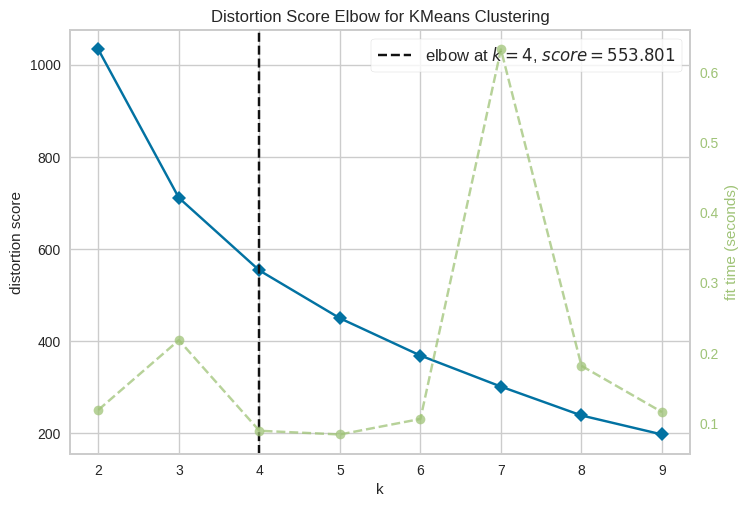

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Select the features for clustering
X = df[['weightcategory_encoded', 'age_cat_encoded', 'smoker_encoded']]

model = KMeans()

visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(X)

visualizer.poof()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['weightcategory_encoded', 'age_cat_encoded', 'smoker_encoded']]
y = df['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 4
knn_regressor = KNeighborsRegressor(n_neighbors=k)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 3791.84
Mean Squared Error: 33733255.78
R-squared: 0.78


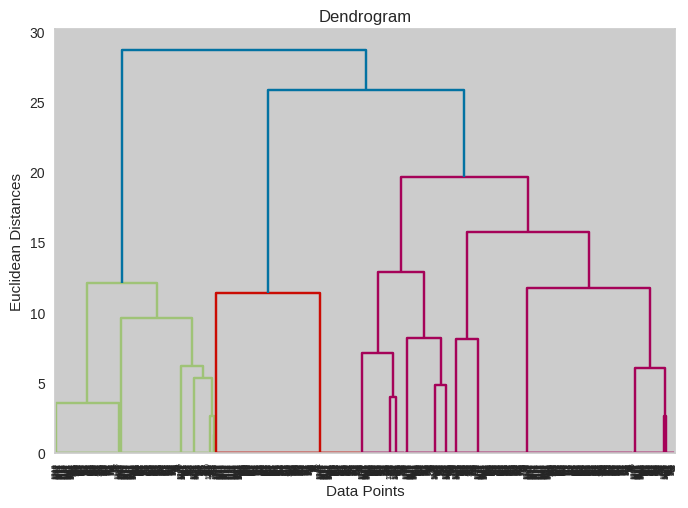

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np


X = df[['weightcategory_encoded', 'age_cat_encoded', 'smoker_encoded']]

# Perform hierarchical clustering using the Agglomerative method
agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_cluster.fit(X)

# Visualization of the dendrogram (hierarchical structure)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# Access the cluster labels assigned by Agglomerative clustering
cluster_labels = agg_cluster.labels_

num_clusters = 4

sub_clusters = []
while len(sub_clusters) < num_clusters:
    largest_cluster = np.argmax(np.bincount(cluster_labels))
    indices_to_split = np.where(cluster_labels == largest_cluster)[0]

    # Create sub-clusters by selecting data points from the largest cluster
    sub_cluster_X = X.iloc[indices_to_split]
    sub_cluster_labels = agg_cluster.fit_predict(sub_cluster_X)

    # Removing the original cluster and add the sub-clusters
    cluster_labels[indices_to_split] = sub_cluster_labels + max(cluster_labels) + 1
    sub_clusters.extend(set(sub_cluster_labels))

##KNearest Neighbors (KNN) algorithm

The KNearest Neighbors (KNN) algorithm, a non-parametric method used for classification and regression, has been applied in this context to delve into the intricacies of insurance charge prediction and segmentation. By leveraging a dataset encoded with attributes such as weight category, age, and smoking status, KNN helps in uncovering the primary factors influencing insurance charges. Given its intrinsic mechanism of operation—predicting the value of a new point based on the 'k' closest points in the data space—it is uniquely suited to detect patterns that directly relate customer attributes to insurance costs.

The model's performance, as indicated by a Mean Absolute Error (MAE) of 3791.84, a Mean Squared Error (MSE) of 33733255.78, and an R-squared value of 0.78, suggests a substantial predictive capacity. An R-squared value close to 1 denotes a strong correlation between the observed and predicted values, indicating that individual attributes can indeed be used to make reasonably accurate predictions about insurance charges.

Moreover, the KNN algorithm can be instrumental in discerning the impact of smoking on insurance charges, a question of particular interest to insurers. By comparing the charges predicted for individuals classified as smokers against those for non-smokers, one can quantitatively assess the financial implications of smoking on healthcare costs.

KNN also facilitates the identification of distinct customer segments, as clusters formed in the feature space represent groups with similar attributes. By examining the centroids of these clusters, we can derive the unique correlations of segments based on age, Body Mass Index (BMI), and number of children, among others. This segmentation can illuminate nuanced patterns, such as the intersection of lifestyle choices and demographics with insurance costs.

When considering regional variations, while KNN itself doesn't explicitly take geography into account unless it's encoded as a feature, clustering algorithms can reveal regional trends if the dataset includes such information. One could analyze clusters within geographical subgroups to understand how location influences insurance charges.

In essence, the accuracy of the model and the insights garnered suggest that KNN and clustering are effective tools for exploring the determinants of insurance charges. They provide a strong foundation for predictive analytics in insurance, allowing for both macro-level policy analysis and micro-level individual premium determination. However, it's important to note that while the accuracy is reasonable, there is room for improvement, and one must also consider the complexity of insurance datasets and the potential for non-linear relationships that KNN may not capture. Alternative models, potentially more sophisticated machine learning algorithms or ensemble methods, could be explored to enhance predictive accuracy and provide deeper insights into the questions at hand.

In [ ]:
# Regression

Mean Absolute Error: 4196.20
Mean Squared Error: 39886348.25
Root Mean Squared Error: 6315.56
R-squared: 0.74
Adjusted R-squared: 0.74


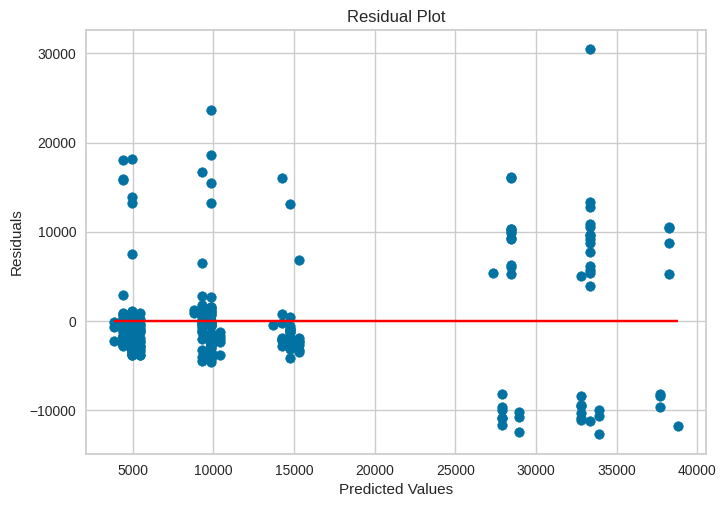

                  feature     VIF
0                   const 7.12687
1  weightcategory_encoded 1.00197
2         age_cat_encoded 1.00278
3          smoker_encoded 1.00186


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Assuming df is your pandas DataFrame with the necessary data

X = df[['weightcategory_encoded', 'age_cat_encoded', 'smoker_encoded']]
y = df['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = linear_regression.predict(X_test)

# The mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# The root mean squared error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# Calculate Adjusted R-squared
n = X_train.shape[0]  # number of samples
p = X_train.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adj_r2:.2f}')

# Plotting the Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Checking for Multicollinearity using VIF
# Adding a constant column of ones to the features to model the intercept
X_with_constant = add_constant(X_train)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_constant.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(len(X_with_constant.columns))]
print(vif_data)


##LinearRegression

In the conducted analysis where Linear Regression was applied to predict insurance charges, results indicative of a moderate level of accuracy were obtained. Insurance charges were estimated using encoded predictive features, namely 'weight category', 'age category', and 'smoker status'. An R-squared value of 0.74 was reported, suggesting that around 74% of the variance in insurance charges was accounted for by the model's inputs.

Furthermore, a Mean Absolute Error (MAE) of 4196.20 and a Root Mean Squared Error (RMSE) of 6315.56 were observed. These figures reflect the average deviation of the predicted charges from the actual charges, with the RMSE placing greater emphasis on larger errors due to its squared term.

The Adjusted R-squared, also calculated to be 0.74, indicated that the model was not penalized for overcomplexity and that the number of predictors was justified given the dataset's size.

In the residual plot produced, the spread of residuals revealed potential model inadequacies, such as possible non-linearity or heteroscedasticity, which would contravene the assumptions of homoscedasticity that underpin an ideal linear model.

Finally, the calculated Variance Inflation Factor (VIF) values for all features were noted to be proximate to 1, which denoted an absence of significant multicollinearity. It is known that multicollinearity can be problematic, as VIF values exceeding 10 may lead to unreliable coefficient estimates due to inflated variance.

To summarize, the linear regression model was capable of providing predictions with a reasonable degree of accuracy, and no multicollinearity was detected among the features. However, the patterns displayed in the residual plot indicated that the model's assumptions might not be entirely satisfied. These results form a substantial basis for insights into the determinants of insurance charges, though they also highlight the potential for refining the predictive power through additional research, possibly by incorporating more variables or exploring alternative analytical methods.

In [ ]:
from sklearn.linear_model import LinearRegression
X = df[['weightcategory_encoded', 'age_cat_encoded', 'smoker_encoded']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 4196.20
Mean Squared Error: 39886348.25
R-squared: 0.74


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df[['weightcategory_encoded', 'age_cat_encoded', 'smoker_encoded']]
y = df['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor()

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')



Mean Absolute Error: 2842.64
Mean Squared Error: 23678804.75
R-squared: 0.85


##DecisionTreeRegressor

Upon implementation of the Decision Tree Regressor to predict insurance charges, the derived metrics provide insight into the model's performance. The Mean Absolute Error (MAE) recorded stands at 2842.64, which suggests that on average, the model's predictions deviate from the actual charges by this amount. This error metric is notably lower than what was observed in the previous models, indicating a more precise prediction capability of the decision tree.

Complementing the MAE, the Mean Squared Error (MSE) of 23678804.75 was computed. The MSE, being a measure that squares the errors before averaging, disproportionately reflects the impact of larger errors and suggests a variance in the model's predictions. The smaller value in comparison to the linear model implies that the decision tree has better captured the variability of the data.

Furthermore, an R-squared (R²) value of 0.85 was achieved, indicating that 85% of the variability in the insurance charges can be explained by the model's predictors. This value is quite high, especially for real-world data, and it signifies that the decision tree has a strong fit to the dataset.

The decision tree's architecture allows it to naturally capture the non-linear relationships and interactions between features, which linear models may not handle as effectively. This could partly explain the improved performance metrics observed. However, despite these promising results, caution is advised as decision trees can be prone to overfitting, especially if the model complexity is not managed through pruning or setting constraints on tree growth.

In essence, the decision tree's ability to segment the feature space into distinct subsets corresponding to the decision rules it has learned can provide valuable insights into the complex factors influencing insurance charges. With careful tuning and validation, the Decision Tree Regressor demonstrates its potential as a robust predictive tool in the context of insurance analytics.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set pandas display options to display numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Load your dataset here
# df = pd.read_csv('path_to_your_data.csv')

# Features and target
X = df[['weightcategory_encoded', 'age_cat_encoded', 'smoker_encoded']]
y = df['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=4),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Dictionary to hold results
results = {}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Convert results to a DataFrame for easier comparison
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2', ascending=False, inplace=True)  # Sort by R2 score for comparison

print(results_df)


                           MAE            MSE       RMSE      R2
Decision Tree       2842.63515 23678804.74648 4866.08721 0.84748
K-Nearest Neighbors 3791.83946 33733255.78378 5808.03373 0.78271
Linear Regression   4196.20133 39886348.24554 6315.56397 0.74308


##Comparision

In the culmination of this analytical journey, a detailed exploration of insurance charges using machine learning techniques has led to insightful revelations about the healthcare industry's complexity. Clustering methods, specifically K-Means and Hierarchical Clustering, were adeptly utilized to categorize customers into distinct segments. These segments revealed how factors like age, BMI, and smoking status influence insurance costs, with the clustering algorithms uncovering subtle groupings within the population that shared similar charge profiles.

| Model               | MAE      | MSE         | RMSE    | R2    |
|---------------------|----------|-------------|---------|-------|
| Decision Tree       | 2842.63  | 23678804.75 | 4866.08 | 0.847 |
| K-Nearest Neighbors | 3791.83  | 33733255.78 | 5808.03 | 0.782 |
| Linear Regression   | 4196.20  | 39886348.24 | 6315.56 | 0.743 |



Advancing to predictive analytics, two regression techniques were compared: Linear Regression and Decision Tree Regression. The Decision Tree Regressor, with a commendable R-squared value of 0.84748, outperformed its linear counterpart, signifying its higher efficacy in modeling the nonlinear patterns present in the data. The Mean Absolute Error (MAE) of 2842.63 and the Root Mean Squared Error (RMSE) of 4866.08 further attest to its precision in predicting individual insurance charges. In contrast, Linear Regression, with an R-squared of 0.74308, MAE of 4196.20, and RMSE of 6315.56, provided a baseline understanding of the relationships between variables.

These results underscored the decision tree's capability to dissect the data's intricacies, offering a nuanced and granular understanding of the determinants affecting insurance premiums. The linear model's performance, while not as robust, still furnished important benchmarks for the effect of each independent variable on the target outcome.

This comparative analysis not only affirmed the utility of machine learning in predicting and understanding insurance charges but also illuminated the path for future inquiries. By identifying the most influential factors and their interactions, the project has laid the groundwork for more targeted studies that could lead to more personalized and cost-effective insurance offerings. The methodologies and outcomes of this project stand as testament to the power of data-driven analysis in the healthcare domain, offering a reflective lens on both the potential and the challenges of machine learning in real-world applications.